In [3]:
#기본 설정
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from collections import Counter
#from linear_algebra import distance, vector_subtract, scalar_multiply

#original version
def squared_distance(v, w):
    return sum_of_squares(vector_subtract(v, w))

def distance(v, w):
   return math.sqrt(squared_distance(v, w))

def vector_subtract(v, w):
    """subtracts two vectors componentwise"""
    return [v_i - w_i for v_i, w_i in zip(v,w)]

def scalar_multiply(c, v):
    return [c * v_i for v_i in v]

def vector_add(v, w):
    """adds two vectors componentwise"""
    return [v_i + w_i for v_i, w_i in zip(v,w)]

def vector_sum(vectors):
    return reduce(vector_add, vectors)

def vector_mean(vectors):
    """compute the vector whose i-th element is the mean of the
    i-th elements of the input vectors"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))


In [4]:
#경사 하강법의 숨의 의미
from functools import reduce
import math, random

import numpy as np
import matplotlib.pyplot as plt

%pylab inline

def sum_of_squares(v):
    """computes the sum of squared elements in v"""
    return sum(v_i ** 2 for v_i in v)

vector = [i for i in range(10)]
sum_of_squares(vector)

np.sum(np.square(vector))


Populating the interactive namespace from numpy and matplotlib


C:\Users\com\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
C:\Users\com\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  if sys.path[0] == '':


285

285

In [10]:
#그래디언트 계산하기
def difference_quotient(f, x, h):
    return (f(x + h) - f(x)) / h

#미분값 계산 1. f가 단변수 함수인 경우
def square(x: float) -> float:
    return x * x

def derivative(x: float) -> float:
    return 2 * x

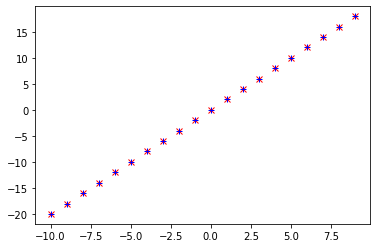

In [11]:
#함수 변화율(미분값) 근사법 1. f가 단변수 함수인 경우
def plot_estimated_derivative():
    def square(x):
        return x * x

    def derivative(x):
        return 2 * x

    derivative_estimate = lambda x: difference_quotient(square, x, h=0.00001)

    # plot to show they're basically the same
    x = range(-10,10)
    plt.plot(x, list(map(derivative, x)), 'rx')           # red  x
    plt.plot(x, list(map(derivative_estimate, x)), 'b+')  # blue +
    plt.show()                                      # purple *, hopefully

plot_estimated_derivative()


In [6]:
#함수 변화율(미분값) 근사법 2. f가 다변수 함수인 경우
def partial_difference_quotient(f, v, i, h):

    # add h to just the i-th element of v
    w = [v_j + (h if j == i else 0) # h를 v의 i번째 변수에만 더해주자
         for j, v_j in enumerate(v)]

    return (f(w) - f(v)) / h

def estimate_gradient(f, v, h=0.00001):
    return [partial_difference_quotient(f, v, i, h)
            for i, _ in enumerate(v)]


In [7]:
#그래디언트 적용하기
def step(v, direction, step_size):
    """move step_size in the direction from v"""
    return [v_i + step_size * direction_i
            for v_i, direction_i in zip(v, direction)]

def sum_of_squares_gradient(v):
    return [2 * v_i for v_i in v]

# 임의의 시작점을 선택
v = [random.randint(-10,10) for i in range(3)]
tolerance = 0.0000001   # 아주 작은 e값

while True:
    #print v, sum_of_squares(v)
    gradient = sum_of_squares_gradient(v)   # compute the gradient at v
    next_v = step(v, gradient, -0.0001)     # take a negative gradient step
    if distance(next_v, v) < tolerance:     # stop if we're converging
        break
    v = next_v                              # continue if we're not
    #print(v)

print("minimum v", v)
print("minimum value", sum_of_squares(v))


C:\Users\com\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  if sys.path[0] == '':


minimum v [-0.00041516941939354285, 0.00024910165163612863, 0.00012455082581806431]
minimum value 2.4993018785938047e-07


In [12]:
#경사 하강법으로 모델 학습
# Using gradient descent to fit models

def gradient_step(v, gradient, step_size):
    """Moves `step_size` in the `gradient` direction from `v`"""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

# x ranges from -50 to 49, y is always 20 * x + 5
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]
print(inputs)

#def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
def linear_gradient(x, y, theta):
    slope, intercept = theta
    predicted = slope * x + intercept
    error = (predicted - y)
    squared_error = error ** 2
    grad = [2 * error * x, 2 * error]
    return grad

[(-50, -995), (-49, -975), (-48, -955), (-47, -935), (-46, -915), (-45, -895), (-44, -875), (-43, -855), (-42, -835), (-41, -815), (-40, -795), (-39, -775), (-38, -755), (-37, -735), (-36, -715), (-35, -695), (-34, -675), (-33, -655), (-32, -635), (-31, -615), (-30, -595), (-29, -575), (-28, -555), (-27, -535), (-26, -515), (-25, -495), (-24, -475), (-23, -455), (-22, -435), (-21, -415), (-20, -395), (-19, -375), (-18, -355), (-17, -335), (-16, -315), (-15, -295), (-14, -275), (-13, -255), (-12, -235), (-11, -215), (-10, -195), (-9, -175), (-8, -155), (-7, -135), (-6, -115), (-5, -95), (-4, -75), (-3, -55), (-2, -35), (-1, -15), (0, 5), (1, 25), (2, 45), (3, 65), (4, 85), (5, 105), (6, 125), (7, 145), (8, 165), (9, 185), (10, 205), (11, 225), (12, 245), (13, 265), (14, 285), (15, 305), (16, 325), (17, 345), (18, 365), (19, 385), (20, 405), (21, 425), (22, 445), (23, 465), (24, 485), (25, 505), (26, 525), (27, 545), (28, 565), (29, 585), (30, 605), (31, 625), (32, 645), (33, 665), (34, 

In [13]:
#경사 하강법으로 모델 학습 예
#from linear_algebra import vector_mean

# Start with random values for slope and intercept
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

learning_rate = .001

for epoch in range(5000):
    # Computer the mean of the gradients
    grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
    # Take a step in that direction
    theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)
slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [33.55593056 -0.62906183]
1 [10.95256525 -0.60424777]
2 [26.02903473 -0.60208671]
3 [15.97303175 -0.5848535 ]
4 [22.68040297 -0.57771076]
5 [18.20659351 -0.56387494]
6 [21.19063826 -0.5545406 ]
7 [19.20028974 -0.54224088]
8 [20.5278645 -0.5319561]
9 [19.64238242 -0.52036433]
10 [20.23301056 -0.50968122]
11 [19.83907228 -0.49842884]
12 [20.10184036 -0.48759291]
13 [19.92658488 -0.47651589]
14 [20.04349137 -0.46563627]
15 [19.96552562 -0.45466151]
16 [20.01753975 -0.44378666]
17 [19.9828572  -0.43288155]
18 [20.00600137 -0.42203293]
19 [19.99057506 -0.41118286]
20 [20.00087525 -0.40036992]
21 [19.99401584 -0.3895683 ]
22 [19.99860187 -0.37879515]
23 [19.99555376 -0.36803896]
24 [19.9975976  -0.35730733]
25 [19.99624509 -0.34659511]
26 [19.99715793 -0.33590568]
27 [19.99655976 -0.32523671]
28 [19.99696941 -0.31458968]
29 [19.99670682 -0.30396353]
30 [19.99689259 -0.29335889]
31 [19.99677928 -0.28277528]
32 [19.99686544 -0.27221295]
33 [19.99681854 -0.26167166]
34 [19.99686036 -0.2511515

In [14]:
#미니 배치 경사 하강법 MGD와 확률적 경사하강법 SGD
# Minibatch and Stochastic Gradient Descent
from typing import TypeVar, List, Iterator

T = TypeVar('T')  # this allows us to type "generic" functions

def minibatches(dataset: List[T],
                batch_size: int,
                shuffle: bool = True) -> Iterator[List[T]]:
    """Generates `batch_size`-sized minibatches from the dataset"""
    # start indexes 0, batch_size, 2 * batch_size, ...
    batch_starts = [start for start in range(0, len(dataset), batch_size)]

    if shuffle: random.shuffle(batch_starts)  # shuffle the batches

    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]

theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(1000):
    for batch in minibatches(inputs, batch_size = 20):
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [18.5914178   8.50978696]
1 [20.06805502  8.56095045]
2 [20.14280363  8.53395571]
3 [20.14873612  8.37960359]
4 [20.05316009  8.37912998]
5 [19.99672489  8.22845744]
6 [20.72606494  8.18997573]
7 [19.83261404  8.16740486]
8 [19.34500974  8.13975739]
9 [20.08318172  8.33014714]
10 [19.78986977  8.31762308]
11 [20.02210018  8.29568322]
12 [20.16168075  8.28186538]
13 [20.14039456  8.13850752]
14 [20.02341478  8.13707024]
15 [20.0013069   8.00182251]
16 [19.99742047  7.98318882]
17 [19.91684796  7.95915909]
18 [19.7850266   7.95063773]
19 [21.32950028  7.87645885]
20 [21.36848521  7.75236085]
21 [20.19897767  7.85682227]
22 [19.98380267  7.83877665]
23 [18.87203219  7.76577868]
24 [19.86471778  7.75292569]
25 [19.93962308  7.73589965]
26 [20.10705562  7.69015536]
27 [20.65384221  7.66160192]
28 [20.05255302  7.57104513]
29 [20.00108237  7.45690109]
30 [20.10017075  7.39069614]
31 [20.57781193  7.36578265]
32 [20.03332249  7.34011597]
33 [19.96827178  7.33006491]
34 [20.07489197  7.30450

In [1]:
print("201702986 김민규")

201702986 김민규
